___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

If you are using python's package manager `pip`, you can install tensorflow by running:
```bash
!pip install tensorflow
```
However, this way of installing packages is discouraged. You should be using a more sophisticated package
manager such as the one that comes with the `anaconda` distribution, which handles dependencies and version compatibility as well.
If you are using `anaconda`, you can install tensorflow with:
```bash
!conda install tensorflow
```
In case you have access to a cuda-enabled gpu, you should instead install the gpu compatible version of tensorflow with:
```bash
!conda install tensorflow-gpu
```
If you are not sure if your gpu is cuda-enabled, you can visit [this link](https://developer.nvidia.com/cuda-gpus).
Please note that, at the time of writing this, only nvidia gpus are cuda-enabled.

In [1]:
try:
    import jupyter_black

    jupyter_black.load()
except ImportError:
    pass

In [2]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
# Check python version
!python --version

Python 3.9.17


In [4]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.11.0'

In [5]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [6]:
# Get more information about the GPU
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

# Keras Syntax Basics

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Uncomment the following lines if you want to suppress warnings:
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [8]:
## If importing data from google drive, import drive from google.colab and mount your drive to the session:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
## Make sure to provide the correct path if drive is mounted:
# df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [10]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [11]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


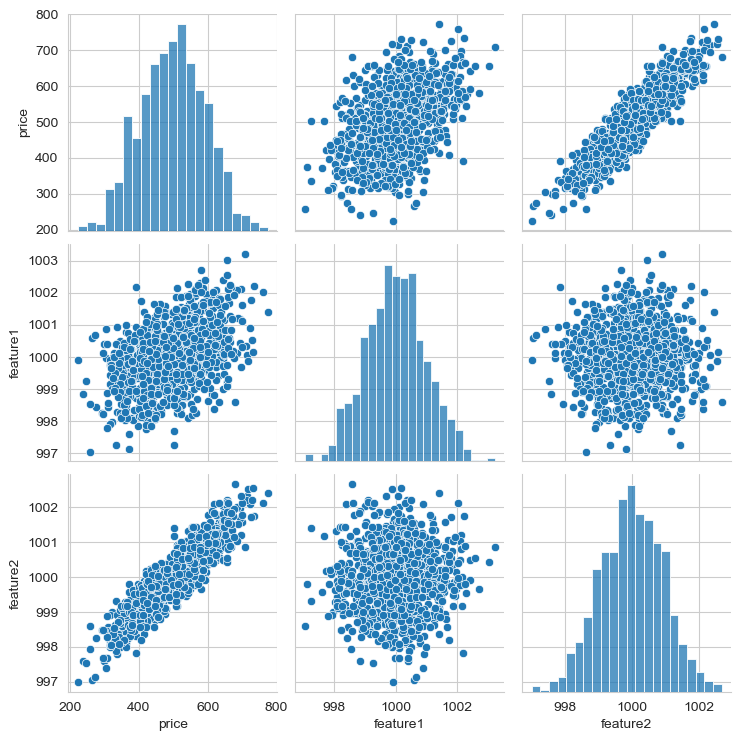

In [14]:
sns.pairplot(df)
plt.show()

In [15]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
1. Split the data into train and test sets
2. Scale the dataset

**Note:** *Neural networks are extremely sensitive to the scale of your data, as they are using gradient descent as the optimisation algorithm which may not converge if the data has columns of different scales.*

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[["feature1", "feature2"]]
y = df["price"]

In [18]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [19]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [20]:
# Neural network leri array olarak alıyor.
# Üstteki gösterimde .values ile alınınca array olarak alıyor.
# İkinci gösterimde dataframe halinde x ve y yi oluşturmamıza rağmen aşağıda scale yapınca tekrar array forma dönüşecek.

In [21]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42
                                                   )

In [23]:
X_train.shape

(700, 2)

In [24]:
X_test.shape

(300, 2)

In [25]:
from sklearn.preprocessing import MinMaxScaler # büyük data setlerinde MinMaxScaler kullanmak daha iyi

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

# Özellikle dummy lenmiş data ile minmax kullanmak daha uygun.

In [26]:
# Uncomment to see the documentation of MinMaxScaler taken from the docstring of the class:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [29]:
import tensorflow as tf

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

# Sequential : model
# Input ve Dense : layer lar

In [31]:
## Uncomment to see the docstring of the Sequential class
# help(Sequential)

In [32]:
## Uncomment to see the docstring of the Dense class.
# help(Dense)

In [33]:
# DENSE, bir önceki layer daki bir nöronun bir sonraki layer daki nöronlarla irtibatını sağlıyor.

In [34]:
X_train.shape

(700, 2)

In [35]:
# ek bilgi: keras ile model 3 şekilde oluşturulur. 
# Şu anda Sequential API ile oluşturmayı görüyoruz
# 2. Functional API 
# 3. Model Subclassing

In [36]:
# First way to create the model using the Sequential API

model = Sequential(
                   [Input(shape=X_train.shape[1]),
                    Dense(units=4, activation="relu"),
                    Dense(units=4, activation="relu"),
                    Dense(units=4, activation="relu"),
                    Dense(units=1),
                   ]
                  )

In [37]:
X_train.shape[1]

2

In [38]:
# The recommended way of creating the model using the Sequential API

model = Sequential()
## Uncomment to explicitly add an input layer (not recommended).
# model.add(Input(shape = X_train.shape[1]))  # --> input layer
model.add(Dense(units=4,                      # Here the first hidden layer
                activation="relu",            # üstteki yapılırsa altta input layer a gerek yok
                input_dim=X_train.shape[1])   # also behaves like the input layer as well,if provided with the input_dim parameter.
          )  

model.add(Dense(units=4, activation="relu"))
model.add(Dense(units=4, activation="relu"))
model.add(Dense(units=1))

# units : neuron sayısı
# dense : hidden layer
# ınput : input layer
# activation : kullanılacak activation function

In [39]:
# burada modelimin yapısını belirliyorum. belirliyorum.

# input layer oluşturmak için
# input_dim = X_train.shape[1] or input_shape = X_train.shape

# input_shape girildiği zaman satır ve sütun istiyor
# input_dim girildiği zaman sadece sütun istiyor
# 2 sinide girmez isek o anlıyor ne alacağını

# Hocalar 2 nci yöntemin kullanılmasını öneriyor. 
# kullanım kolaylığı ve esneklik açısından .add() kullanarak layerları oluşturuyoruz.

In [40]:
# If input_dim is not provided when the model was created, this will return an error
# because input dimensions are needed to calculate the number of parameters.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.6979592 ,  0.721833  , -0.7633488 ,  0.23955107],
        [-0.5501337 ,  0.80226207, -0.30374646, -0.3829069 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.3611551 , -0.0104636 , -0.2429564 ,  0.35023564],
        [ 0.20655268, -0.1122095 , -0.75908744,  0.10315669],
        [ 0.23436159,  0.77193505,  0.7079391 ,  0.22486597],
        [-0.34385115, -0.54890716,  0.8244489 , -0.18218273]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.69025767,  0.1712591 ,  0.67792875, -0.76309085],
        [ 0.4704793 ,  0.33426946,  0.02062827,  0.36346143],
        [-0.02136558, -0.47783297, -0.5434

### Choosing an optimizer and loss

Keep in mind what kind of a problem you are trying to solve:

- For a multi-class classification problem:
```python
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
```
- For a binary classification problem:
```python
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
```
- For a regression problem with `mse` loss:
```python
    model.compile(optimizer='rmsprop',
                  loss='mse')
```

**Note:** *The optimiser* `rmsprop` *was chosen as an example here. You can choose any optimiser you want that is suitable for the problem you have at hand.*

In [42]:
model.compile(optimizer="rmsprop", loss="mse")

# içerisinde çalışacak cost function ve optimizer parametresini belirliyorum.

In [43]:
model.fit(x=X_train, y=y_train, batch_size=32, epochs=250)

# 700/32 = 21.875

# 250x22 defa bu model 32 lik paketlerle fit edilecek

# 1 Epoch = 1 Forward pass + 1 Backward pass for ALL training samples.

# Batch Size = Number of training samples in 1 Forward/1 Backward pass. 
# (With increase in Batch size, required memory space increases.)

# Number of iterations = Number of passes i.e. 1 Pass = 1 Forward pass + 1 Backward pass 
# (Forward pass and Backward pass are not counted differently.)

# Example : If we have 1000 training samples and Batch size is set to 500, it will take 2 iterations to complete 1 Epoch.

Epoch 1/250
22/22 [==============================] - 1s 4ms/step - loss: 256725.8281
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 256673.9688
Epoch 3/250
22/22 [==============================] - 0s 5ms/step - loss: 256635.6406
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256595.5625
Epoch 5/250
22/22 [==============================] - 0s 4ms/step - loss: 256552.1406
Epoch 6/250
22/22 [==============================] - 0s 4ms/step - loss: 256504.0938
Epoch 7/250
22/22 [==============================] - 0s 5ms/step - loss: 256451.4219
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 256393.7812
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 256330.9531
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 256262.3281
Epoch 11/250
22/22 [==============================] - 0s 4ms/step - loss: 256188.2031
Epoch 12/250
22/22 [==============================] - 0s 4ms/st

22/22 [==============================] - 0s 2ms/step - loss: 170453.5000
Epoch 97/250
22/22 [==============================] - 0s 3ms/step - loss: 167836.8281
Epoch 98/250
22/22 [==============================] - 0s 3ms/step - loss: 165175.8906
Epoch 99/250
22/22 [==============================] - 0s 3ms/step - loss: 162452.2812
Epoch 100/250
22/22 [==============================] - 0s 2ms/step - loss: 159694.5000
Epoch 101/250
22/22 [==============================] - 0s 2ms/step - loss: 156898.5625
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 154057.9375
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 151170.0469
Epoch 104/250
22/22 [==============================] - 0s 2ms/step - loss: 148272.1406
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 145302.6562
Epoch 106/250
22/22 [==============================] - 0s 5ms/step - loss: 142273.0156
Epoch 107/250
22/22 [==============================] - 0s 3m

22/22 [==============================] - 0s 3ms/step - loss: 1412.3109
Epoch 192/250
22/22 [==============================] - 0s 2ms/step - loss: 1394.9001
Epoch 193/250
22/22 [==============================] - 0s 2ms/step - loss: 1381.4200
Epoch 194/250
22/22 [==============================] - 0s 4ms/step - loss: 1364.1650
Epoch 195/250
22/22 [==============================] - 0s 4ms/step - loss: 1347.9301
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 1333.6405
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 1315.9558
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 1300.1793
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 1283.9016
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 1268.0009
Epoch 201/250
22/22 [==============================] - 0s 3ms/step - loss: 1252.9413
Epoch 202/250
22/22 [==============================] - 0s 3ms/step - loss: 1238

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.6979592 ,  3.5528488 , -0.7633488 ,  0.15741004],
        [-0.5501337 ,  5.7434955 , -0.30374646, -0.4338562 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        ,  2.479282  ,  0.        , -0.08924782], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.3611551 , -0.0104636 , -0.2429564 ,  0.35023564],
        [ 3.9208539 , -0.1122095 , -0.75908744,  0.00825792],
        [ 0.23436159,  0.77193505,  0.7079391 ,  0.22486597],
        [-0.22422591, -0.54890716,  0.8244489 , -0.22094324]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([ 2.4902933 ,  0.        ,  0.        , -0.09030966], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-6.9025767e-01,  1.7385692e-03,  4.3175254e+00, -7.6309085e-01],
        [ 4.7047931e

In [46]:
# Note that the weights attribute is a python list type.
type(model.weights)

list

In [47]:
# Since it's a python list type, we can index it to get weight values for a layer at the specified index.
# This returns the weight values for the first hidden layer.
model.weights[0]

<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
array([[-0.6979592 ,  3.5528488 , -0.7633488 ,  0.15741004],
       [-0.5501337 ,  5.7434955 , -0.30374646, -0.4338562 ]],
      dtype=float32)>

In [48]:
# This returns the bias values for the first hidden layer.
model.weights[1]

<tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        ,  2.479282  ,  0.        , -0.08924782], dtype=float32)>

In [49]:
# The training history can be accessed like so:
model.history.history

 # model eğitilirken alınan LOSS değerlerini veriyor.

{'loss': [256725.828125,
  256673.96875,
  256635.640625,
  256595.5625,
  256552.140625,
  256504.09375,
  256451.421875,
  256393.78125,
  256330.953125,
  256262.328125,
  256188.203125,
  256106.96875,
  256019.0625,
  255924.296875,
  255821.25,
  255710.765625,
  255591.75,
  255463.796875,
  255326.421875,
  255179.125,
  255021.578125,
  254853.25,
  254673.640625,
  254482.765625,
  254279.15625,
  254062.859375,
  253833.140625,
  253589.171875,
  253330.671875,
  253056.0625,
  252767.859375,
  252463.359375,
  252140.875,
  251800.6875,
  251443.515625,
  251066.90625,
  250672.40625,
  250257.09375,
  249822.953125,
  249365.765625,
  248884.59375,
  248383.34375,
  247860.34375,
  247313.296875,
  246741.890625,
  246144.75,
  245520.25,
  244871.9375,
  244193.921875,
  243488.84375,
  242757.671875,
  241994.28125,
  241203.203125,
  240379.046875,
  239527.640625,
  238639.6875,
  237722.3125,
  236772.1875,
  235785.171875,
  234767.0625,
  233713.71875,
  232624.0625

<Axes: >

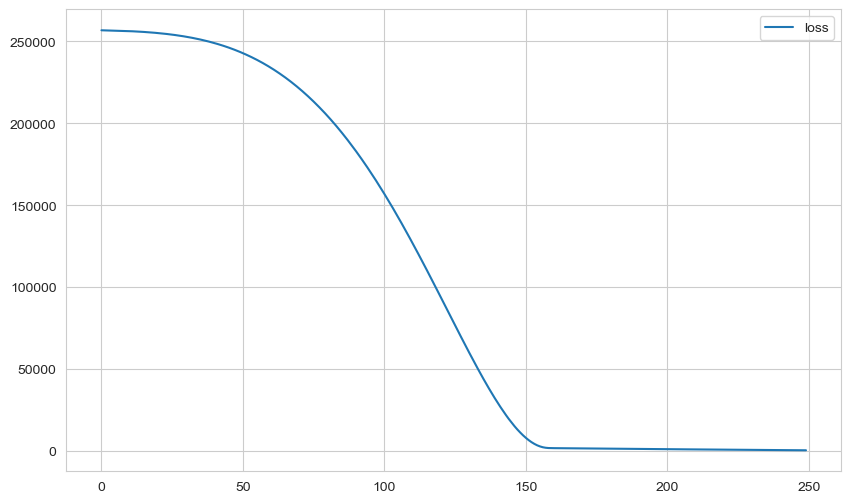

In [50]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

 # model eğitilirken alınan LOSS değerlerini veriyor.

(0.0, 3000.0)

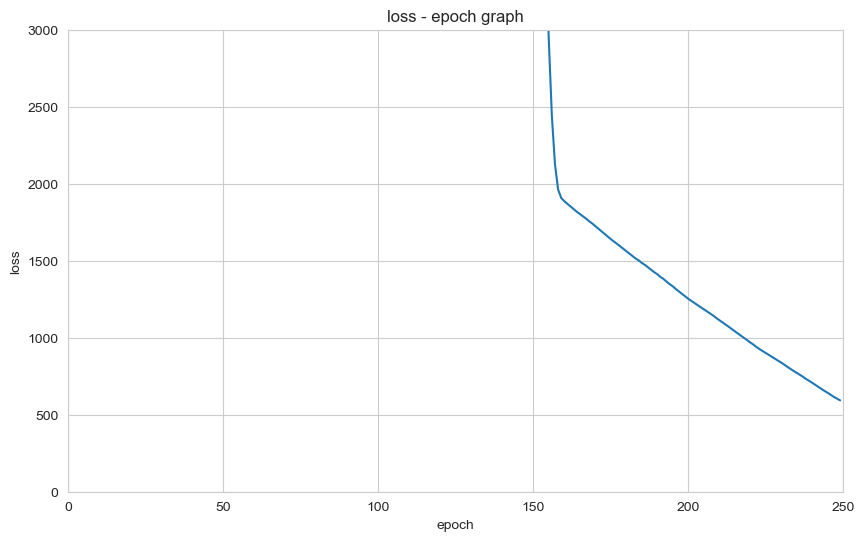

In [51]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250])  # focusing on the given x values
ax.set_ylim([0, 3000])  # focusing on the given y values

In [52]:
# Eğer input shape girerseniz
# modelinizin ağırlık değerleri ilk fit yapmadan önce modelinizde bulunur.
# input shape girmezseniz eğer, fitledikten sonra modeliniz tam anlamıyla kurulmuş oluyor.

# Eğer input_shape başlangıçta girilirse; başlangıç ağırlık değerleri fit işleminden önce modele verilir ve modelin 
# history si alındığında görülür.

In [53]:
# Eğer input shape girerseniz modelinizin ağırlık değerleri ilk fit yapmadan önce modelinizde bulunur.
# input shape girmezseniz eğer, fitledikten sonra modeliniz tam anlamıyla kurulmuş oluyor.

In [54]:
# modelin içerisine train setimizi verip skor alıyoruz
# bu skor; compile a tanımladığımız LOSS değerleridir.

## Model Performance

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [80]:
model.evaluate(X_train, y_train, verbose=0)

# buradaki değer train seti için LOSS değeri

205.8682861328125

In [81]:
model.evaluate(X_test, y_test, verbose=0)

198.1604766845703

In [82]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [83]:
my_dict = {
    "Actual": y_test,
    "Pred": y_pred.reshape(
        -1,
    ),
}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
902,656.655,632.519
481,595.854,585.018
946,594.840,585.099
355,411.184,432.160
621,448.519,449.096
298,511.367,519.022
429,526.448,523.179
249,599.924,584.835
589,549.291,538.132
526,556.832,552.934


<Axes: xlabel='Actual', ylabel='Pred'>

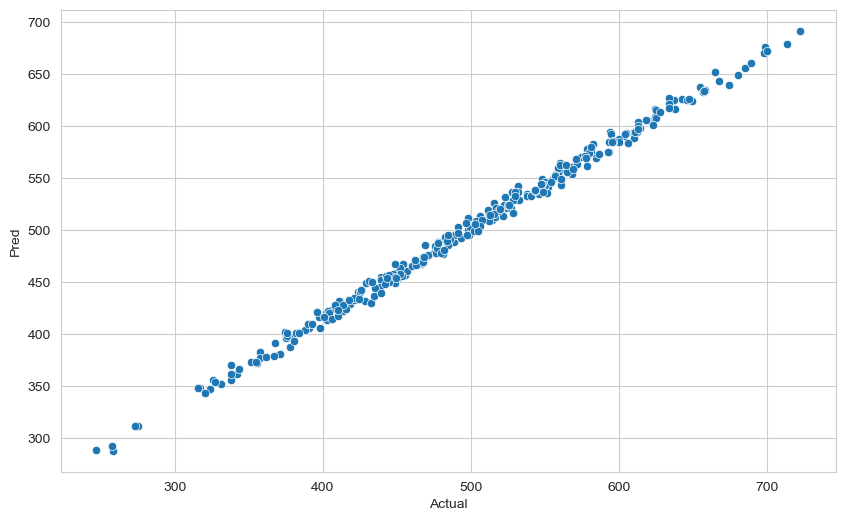

In [84]:
sns.scatterplot(x="Actual", y="Pred", data=compare)

In [85]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [86]:
eval_metric(y_test, y_pred)

r2_score: 0.977461354061328 
mae: 11.121811781085603 
mse: 198.16048878833004 
rmse: 14.076948845127273


## Final Model and Model Deployment

### Final Model Training

In [87]:
scaler = MinMaxScaler().fit(X)

In [88]:
import pickle

pickle.dump(scaler, open("scaler_fake_reg", "wb"))

In [89]:
X_scaled = scaler.transform(X)

In [90]:
final_model = Sequential()

final_model.add(Dense(units=4, activation="relu"))  # input_dim=2 or input_dim=X_train.shape[1]
final_model.add(Dense(units=4, activation="relu"))
final_model.add(Dense(units=4, activation="relu"))
final_model.add(Dense(1))

final_model.compile(optimizer="rmsprop", loss="mse")

final_model.fit(x=X_scaled, y=y, batch_size=32, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257439.4375
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 257405.5156
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 257356.6875
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 257138.5781
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 256867.1719
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 256589.1562
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 256262.3750
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 255873.6875
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 255416.0156
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 254883.5781
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 254271.7812
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 24.6215
Epoch 196/250
32/32 [==============================] - 0s 2ms/step - loss: 24.4601
Epoch 197/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6228
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6275
Epoch 199/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5153
Epoch 200/250
32/32 [==============================] - 0s 1ms/step - loss: 24.6214
Epoch 201/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5351
Epoch 202/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5697
Epoch 203/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5329
Epoch 204/250
32/32 [==============================] - 0s 1ms/step - loss: 24.2789
Epoch 205/250
32/32 [==============================] - 0s 1ms/step - loss: 24.5269
Epoch 206/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7368
Epoch 207/250
32/3

### Saving a Model

You can save a TensorFlow/Keras model using the method [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [91]:
final_model.save("model_fake_reg.h5")  # creates a HDF5 file 'my_model.h5'

In [92]:
# final_model.save("model_fake_reg")

### Loading Model

In [93]:
from tensorflow.keras.models import load_model

In [94]:
model_fake_reg = load_model("model_fake_reg.h5")

In [95]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [96]:
sample = [[998, 1000]]

In [97]:
sample_scaled = scaler_fake_reg.transform(sample)

C:\Users\Toshiba\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [98]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 340ms/step


array([[420.97995]], dtype=float32)

## Prediction-2

In [99]:
my_dict = {
    "feature1": [997, 998, 999, 1000, 1001],
    "feature2": [1000, 999, 998, 997, 996],
}

In [100]:
sample = pd.DataFrame(my_dict)
sample

,feature1,feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [101]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [102]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 180ms/step


array([[380.7292 ],
       [332.24963],
       [283.77008],
       [235.29059],
       [186.81102]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___